In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:/Users/HUMNA/Downloads/10 - Detailed Results- Bihar.csv",skiprows=2)
df.head()

,STATE/UT NAME,AC NO.,AC NAME,CANDIDATE NAME,SEX,AGE,CATEGORY,PARTY,SYMBOL,GENERAL,POSTAL,TOTAL,% VOTES POLLED,TOTAL ELECTORS
0,Bihar,1,Valmikinagar,1 Dhirendra Pratap Singh alias Rinku singh,MALE,40.0,GENERAL,JD(U),Arrow,74777.0,129.0,74906.0,38.317245,331874.0
1,Bihar,1,Valmikinagar,2 Rajesh Singh,MALE,42.0,GENERAL,INC,Hand,52952.0,369.0,53321.0,27.275703,331874.0
2,Bihar,1,Valmikinagar,3 Sumant Kumar,MALE,26.0,ST,JAPL,Scissors,18372.0,37.0,18409.0,9.416898,331874.0
3,Bihar,1,Valmikinagar,4 Baidyanath Prasad,MALE,61.0,ST,BSP,Elephant,14475.0,23.0,14498.0,7.416274,331874.0
4,Bihar,1,Valmikinagar,5 NOTA,NaN,NaN,NaN,NOTA,NOTA,8088.0,2.0,8090.0,4.138340,331874.0


In [4]:
df = df.rename(columns={'AC NAMECANDIDATE NAME': 'AC NAME', 'AC NAMECANDIDATE NAME': 'CANDIDATE NAME'})
df.columns = df.columns.str.strip()
df_sorted = df.sort_values(by=['AC NAME', 'TOTAL'], ascending=[True, False])
df_sorted.head(2)

,STATE/UT NAME,AC NO.,AC NAME,CANDIDATE NAME,SEX,AGE,CATEGORY,PARTY,SYMBOL,GENERAL,POSTAL,TOTAL,% VOTES POLLED,TOTAL ELECTORS
3376,Bihar,195,Agiaon,1 MANOJ MANZIL,MALE,36.0,SC,CPI(ML)(L),Flag with Three Stars,85397.0,930.0,86327.0,61.392018,268019.0
3377,Bihar,195,Agiaon,2 PRABHUNATH PRASAD,MALE,49.0,SC,JD(U),Arrow,37232.0,545.0,37777.0,26.865364,268019.0


In [7]:
results_grouped = df.groupby('AC NAME')['TOTAL'].sum()

In [9]:
# 1. Sort the original DataFrame by 'AC NAME' and 'TOTAL' to ensure the winner is always at the top of each group.
df_sorted = df.sort_values(by=['AC NAME', 'TOTAL'], ascending=[True, False])

# 2. Now, perform the grouping on the sorted data.
# This ensures that when you iterate through the groups, the first row (iloc[0]) will be the winner
# and the second row (iloc[1]) will be the runner-up for each 'AC NAME'.
final_results = []
for ac_name, group in df_sorted.groupby('AC NAME'):
    if len(group) >= 2:
        winner = group.iloc[0]
        runner_up = group.iloc[1]
        
        # Calculate winning margin
        winning_margin = winner['TOTAL'] - runner_up['TOTAL']

        # Calculate winning margin percentage, handling division by zero
        if winner['TOTAL'] > 0:
            winning_margin_percent = (winning_margin / winner['TOTAL']) * 100
        else:
            winning_margin_percent = 0
            
        final_results.append({
            'AC NAME': ac_name,
            'Winner': winner['CANDIDATE NAME'],
            'Winner Votes': winner['TOTAL'],
            'Runner-Up': runner_up['CANDIDATE NAME'],
            'Runner-Up Votes': runner_up['TOTAL'],
            'Winning Margin': winning_margin,
            'Winning Margin Percent': winning_margin_percent
        })

# 3. Create the final DataFrame from the list of dictionaries.
output_df = pd.DataFrame(final_results)

print("Analysis Complete. Here are the results:")
print(output_df)

Analysis Complete. Here are the results:
          AC NAME                                      Winner  Winner Votes  \
0          Agiaon                              1 MANOJ MANZIL       86327.0   
1       Alamnagar                    1 NARENDRA NARAYAN YADAV      102517.0   
2          Alauli                            1 RAMVRIKSH SADA       47183.0   
3        Alinagar                          1 Mishri Lal Yadav       61082.0   
4         Amarpur                                1 Jayant Raj       54308.0   
..            ...                                         ...           ...   
236  Valmikinagar  1 Dhirendra Pratap Singh alias Rinku singh       74906.0   
237    Warisnagar                               1 Ashok Kumar       68356.0   
238   Warsaliganj                                1 Aruna Devi       62451.0   
239     Wazirganj                            1 Birendra Singh       70713.0   
240       Ziradei                         1 Amarjeet Kushwaha       69442.0   

          

In [10]:
least_margin_df = output_df.sort_values(by='Winning Margin Percent', ascending=True)
top_10_least_margin = least_margin_df.head(10)
print("\nTop 10 ACs with the Least Winning Margin Percentage:")
print(top_10_least_margin)


Top 10 ACs with the Least Winning Margin Percentage:
       AC NAME                                   Winner  Winner Votes  \
101      Hilsa  1 Krishnamurari Sharan urf Prem Mukhiya       61848.0   
32    Barbigha                        1 SUDARSHAN KUMAR       39878.0   
193    Ramgarh                         1 Sudhakar Singh       58083.0   
152   Matihani                        1 Raj Kumar Singh       61364.0   
48      Bhorey                            1 Sunil Kumar       74067.0   
72       Dehri                    1 PHATE BAHADUR SINGH       64567.0   
115  Kalyanpur                      1 Manoj Kumar Yadav       72819.0   
15   Bachhwara                        1 SURENDRA MEHATA       54738.0   
131    Kurhani                       1 Anil Kumar Sahni       78549.0   
22      Bakhri                       1 SURYAKANT PASWAN       72177.0   

                               Runner-Up  Runner-Up Votes  Winning Margin  \
101   2 Atri Muni urf Shakti Singh Yadav          61836.0        

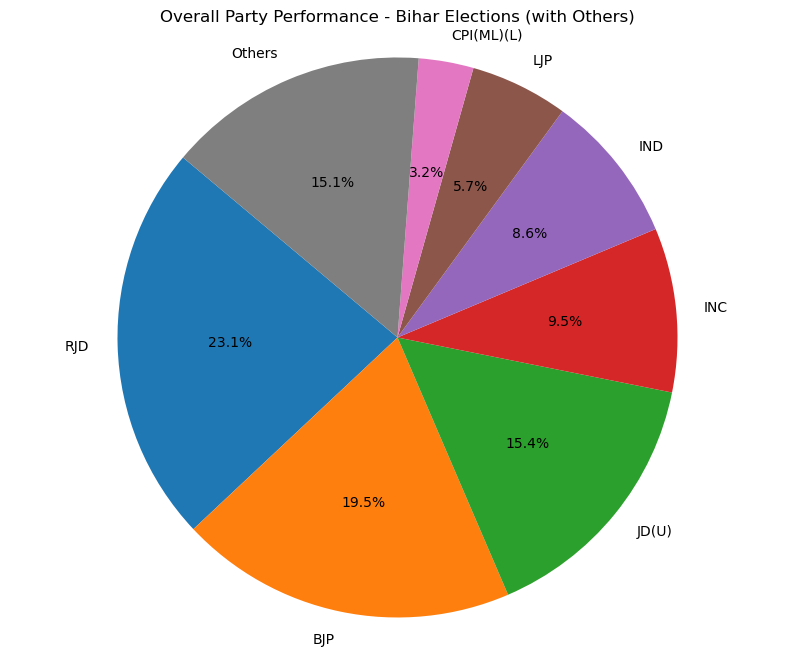

In [13]:
import matplotlib.pyplot as plt

# Group by PARTY and sum total votes
party_performance = df.groupby('PARTY')['TOTAL'].sum().sort_values(ascending=False)

# Define threshold (parties with <2% votes will go into "Others")
threshold = 0.02 * party_performance.sum()

# Separate major and minor parties
major_parties = party_performance[party_performance >= threshold]
others = party_performance[party_performance < threshold].sum()

# Add "Others" to the major parties (using concat instead of append)
party_performance_cleaned = pd.concat([major_parties, pd.Series({'Others': others})])

# Plot Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(party_performance_cleaned, labels=party_performance_cleaned.index, 
        autopct='%1.1f%%', startangle=140)
plt.title("Overall Party Performance - Bihar Elections (with Others)")
plt.axis('equal')
plt.show()


In [14]:


# Define bins and labels for tiers
bins = [-np.inf, 2, 5, 10, np.inf]
labels = [
    "Tier 1: Key Battleground (≤2%) 🎯",
    "Tier 2: Competitive (2-5%)",
    "Tier 3: Leaning (5-10%)",
    "Tier 4: Stronghold/Weak (>10%) 🛡️"
]

# Categorize each constituency
output_df['Strategic Tier'] = pd.cut(output_df['Winning Margin Percent'], 
                                     bins=bins, labels=labels)

# Group by tier and count constituencies
tier_summary = output_df['Strategic Tier'].value_counts().sort_index()

print("Strategic Tier Distribution:\n")
print(tier_summary)

# (Optional) Display a few examples from each tier
for tier in labels:
    sample = output_df[output_df['Strategic Tier'] == tier].head(3)
    print(f"\nExamples from {tier}:\n", sample[['AC NAME', 'Winner', 'Runner-Up', 'Winning Margin Percent']])


Strategic Tier Distribution:

Strategic Tier
Tier 1: Key Battleground (≤2%) 🎯      14
Tier 2: Competitive (2-5%)            24
Tier 3: Leaning (5-10%)               28
Tier 4: Stronghold/Weak (>10%) 🛡️    175
Name: count, dtype: int64

Examples from Tier 1: Key Battleground (≤2%) 🎯:
       AC NAME              Winner            Runner-Up  Winning Margin Percent
15  Bachhwara   1 SURENDRA MEHATA  2 ABDHESH KUMAR RAI                0.884212
22     Bakhri  1 SURYAKANT PASWAN  2 RAMSHANKAR PASWAN                1.076520
32   Barbigha   1 SUDARSHAN KUMAR     2 GAJANAND SHAHI                0.283364

Examples from Tier 2: Competitive (2-5%):
        AC NAME                   Winner            Runner-Up  \
8        Arrah  1 Amrendra Pratap singh  2 Quyamuddin Ansari   
13  Aurangabad    1 ANAND SHANKAR SINGH     2 RAMADHAR SINGH   
18  Bahadurpur            1 Madan Sahni   2 Ramesh Choudhary   

    Winning Margin Percent  
8                 4.182165  
13                3.203462  
18         